<a href="https://colab.research.google.com/github/arjunverma2004/Krish-Naik-Data-Science-course-code/blob/main/Practice%20Code/S41_practice_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##🧪 1. Customer Segmentation (Clustering by Spending Behavior)


In [ ]:
!pip install kagglehub[pandas-datasets]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Mall_Customers.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",file_path

  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-4-9472f97e3fe7>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


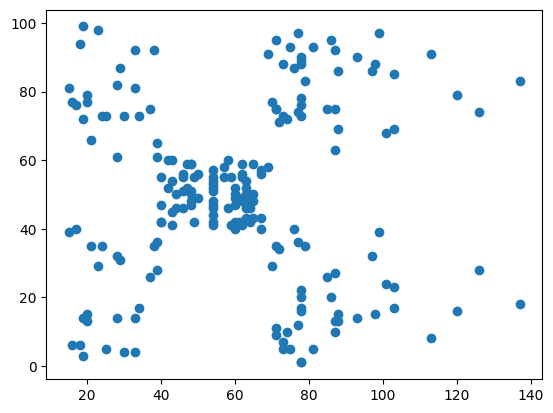

In [ ]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])


In [ ]:
X_train_scaled=pd.DataFrame(df_scaled,columns=['Annual Income (k$)','Spending Score (1-100)'])

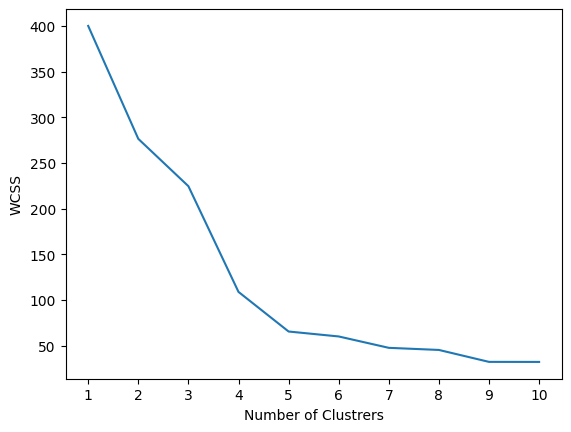

In [ ]:
from sklearn.cluster import KMeans
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator

In [ ]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
kl.elbow

np.int64(5)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

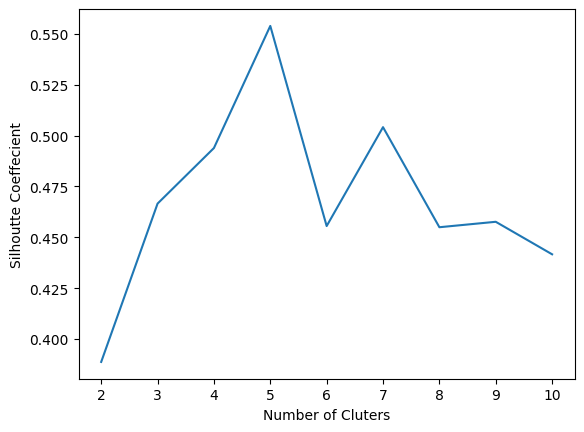

In [ ]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

##🧪 3. K-Means on Iris Dataset (Unlabeled Clustering)


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
df=pd.DataFrame(load_iris().data,columns=load_iris().feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,load_iris().target,test_size=0.2,random_state=42)

In [ ]:
scaler1=StandardScaler()
X_train_scaled=scaler1.fit_transform(X_train)
X_test_scaled=scaler1.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

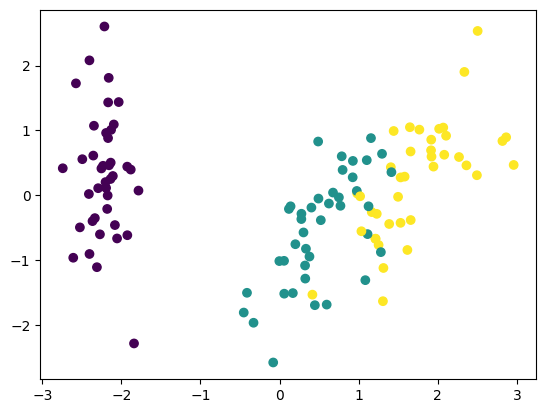

In [ ]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train)

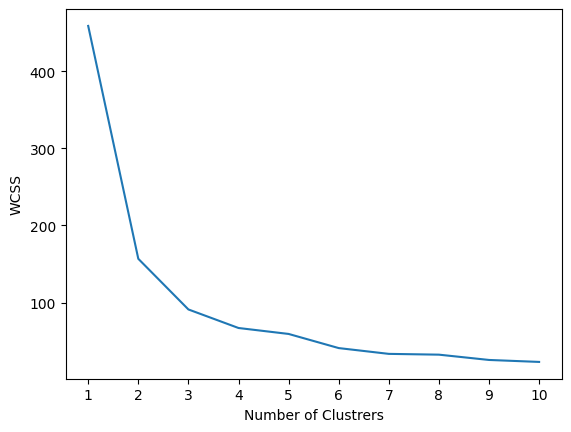

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_pca)
    wcss.append(kmeans.inertia_)
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [ ]:
knee_locator=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
knee_locator.elbow

np.int64(3)

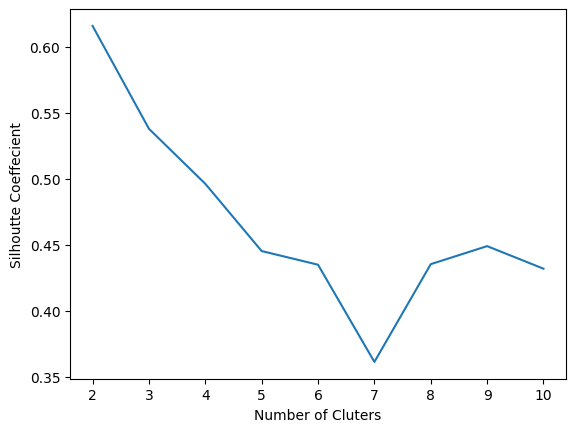

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_pca)
    score=silhouette_score(X_train_pca,kmeans.labels_)
    silhouette_coefficients.append(score)
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

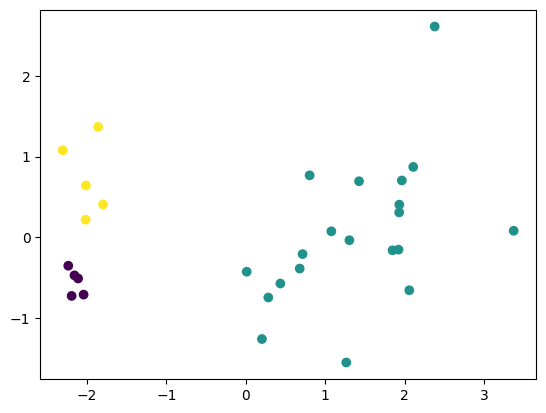

In [ ]:
kmeans1=KMeans(n_clusters=3,init="k-means++")
kmeans1.fit(X_train_pca)
y_pred=kmeans1.predict(X_test_pca)
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[ 5,  0,  5],
       [ 0,  9,  0],
       [ 0, 11,  0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4666666666666667

In [ ]:
df=[y_test,y_pred]
df=pd.DataFrame(df)
df=df.T
df.columns=["y_test","y_pred"]
df

,y_test,y_pred
0,1,1
1,0,2
2,2,1
3,1,1
4,1,1
5,0,2
6,1,1
7,2,1
8,1,1
9,1,1
